<u><b>Deep Learning : Principles and Practices - CSE1016 - L33 + L34</b></u>

<u><b>Name: </b></u> Nikhil V

<u><b>Registration No: </b></u> CH.EN.U4AIE22038

<u><b>Lab - 4 : </b></u> MLP Implementation using Keras on MNIST

# Importing the required modules

In [1]:
!pip install tensorflow

# Modules used for data handling.
import pandas as pd
import numpy as np
from numpy import expand_dims

# Modules used for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# Module used to perform random choice from an iterable.
import random as r

# Modules used to build the MLP architecture
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as tk
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Activation

# Module used for data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

sns.set_style()

2.16.0-rc0


In [2]:
# Centering all the output images in the notebook.
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Loading the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

# Sample Images from the dataset

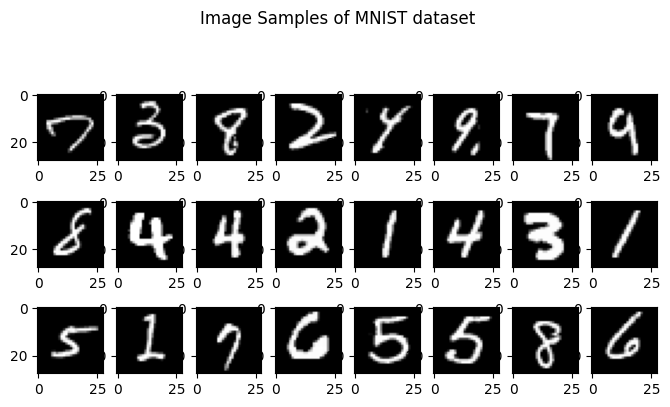

In [4]:
rows = 3
columns = 8
fig, axs = plt.subplots(rows, columns,figsize=(8,8))
for i in range(rows):
    for j in range(columns):
        axs[i,j].imshow(r.choice(x_train),cmap='gray')
fig.suptitle("Image Samples of MNIST dataset")
plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
plt.show()

# Class Distribution

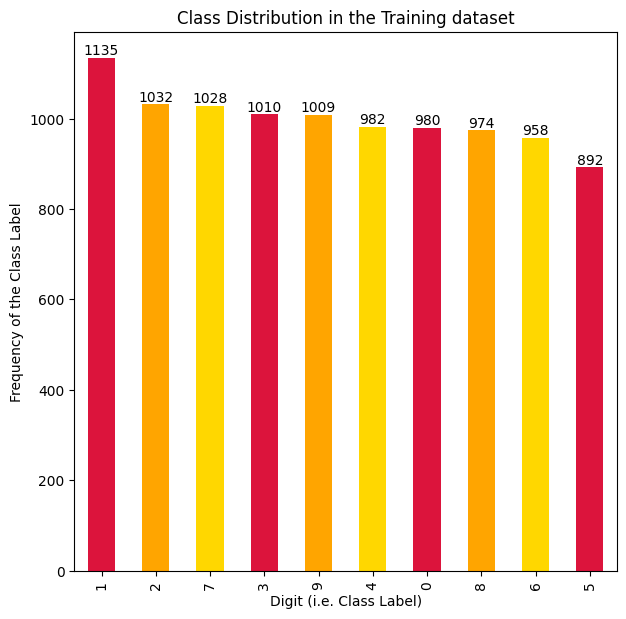

In [5]:
plt.figure(figsize=(7,7))
ax = pd.Series(y_test).value_counts().plot(kind="bar",
                                      color=["crimson","orange","gold"])
plt.title("Class Distribution in the Training dataset")
plt.xlabel("Digit (i.e. Class Label)")
plt.ylabel("Frequency of the Class Label")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

There are maximum images of digit 1 which may lead to the model being biased to that class label. However, the other classes are uniformly distributed.

# Data Augmentation

In [6]:
class ImageDataAugmentation:
    
    def __init__(self, x_train, y_train, x_test, y_test, rotation_range, width_shift, height_shift, shear_range, zoom_range):
            self.x_train = x_train
            self.y_train = y_train
            self.x_test = x_test
            self.y_test = y_test
            self.rotation_range = rotation_range
            self.width_shift = width_shift
            self.height_shift = height_shift
            self.shear_range = shear_range
            self.zoom_range = zoom_range
            
    def fit_generator(self):
        self.datagen = ImageDataGenerator(rotation_range=self.rotation_range,
                                          width_shift_range=self.width_shift,
                                          height_shift_range=self.height_shift,
                                          zoom_range=self.zoom_range)
        self.datagen.fit(self.x_train.reshape(x_train.shape[0], 28, 28, 1))
    
    def display_samples(self, rows : int, cols : int):
        num = rows*cols
        fig, ax = plt.subplots(rows, cols, figsize=(8,8))
        self.x = self.datagen.flow(self.x_train.reshape(self.x_train.shape[0], 28, 28, 1),
                     self.y_train.reshape(self.y_train.shape[0], 1),
                     batch_size=num,
                     shuffle=False)
        for X, Y in self.x:
            for i in range(num):
                axis = ax[i//cols, i%cols]
                axis.imshow(X[i].reshape(28,28), cmap='gray')
                axis.set_title('Label: {}'.format(int(Y[i])))
            break
        plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0.1)
        fig.suptitle("Image Samples of MNIST dataset after Augmentation")
        plt.show()

In [7]:
ida = ImageDataAugmentation(x_train, y_train, x_test, y_test, 30, 0.25, 0.25, 45, [0.5, 1.5])

In [8]:
ida.fit_generator()

C:\Users\V Nikhil\AppData\Local\Temp\ipykernel_11808\1794435373.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axis.set_title('Label: {}'.format(int(Y[i])))


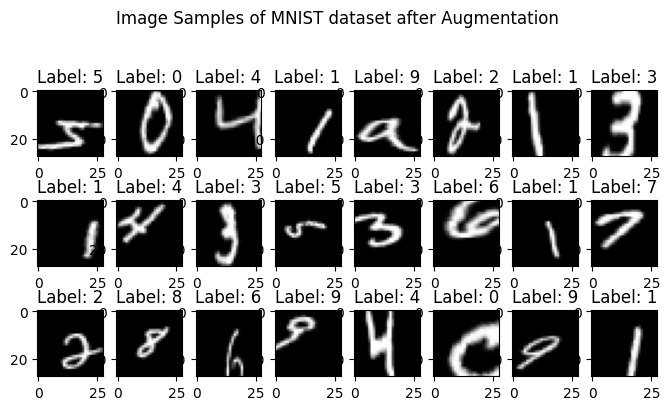

In [9]:
ida.display_samples(3,8)

# Multilayer Perceptron with data augmentation

In [10]:
from tensorflow.keras.utils import to_categorical

class ModelBuilding:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test
    
    def preprocess_data(self):
        # Reshape the input data
        self.X_train = self.X_train.reshape(self.X_train.shape[0], -1) 
        self.X_test = self.X_test.reshape(self.X_test.shape[0], -1)
        
        # Convert labels to categorical format
        self.Y_train = to_categorical(self.Y_train, 10)
        self.Y_test = to_categorical(self.Y_test, 10)
        
        # Set other parameters
        self.output_dim = 10
        self.input_dim = self.X_train.shape[1]
        self.batch_size = 128 
        self.nb_epoch = 20

    def build_model_1_layers(self):
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        self.model.add(Dense(self.output_dim, activation='softmax'))
        self.model.summary()
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    def build_model_2_layers(self):
        self.model = Sequential()
        self.model.add(Dense(512, activation='relu', input_shape=(self.input_dim,)))
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(self.output_dim, activation='softmax'))
        self.model.summary()
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    def train_model(self):
        self.history = self.model.fit(self.X_train, self.Y_train, 
                                      batch_size=self.batch_size, 
                                      epochs=self.nb_epoch, verbose=1, 
                                      validation_data=(self.X_test, self.Y_test))
    
    def plot_history(self, title):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(title)
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    
    def evaluate_model(self):
        print("Test Dataset Loss: ", self.history.history['val_loss'][-1])
        print("Test Dataset Accuracy: ", self.history.history['val_accuracy'][-1])


# MLP Implementation

## Reshaping the input data

In [11]:
m = ModelBuilding(x_train, y_train, x_test, y_test)

In [12]:
m.preprocess_data()

## Model with one layer

### Building the model

In [13]:
m.build_model_1_layers()

c:\Users\V Nikhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [14]:
m.train_model()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8565 - loss: 9.5123 - val_accuracy: 0.9509 - val_loss: 0.9808
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9554 - loss: 0.6926 - val_accuracy: 0.9487 - val_loss: 0.6524
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9682 - loss: 0.3096 - val_accuracy: 0.9522 - val_loss: 0.5579
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9731 - loss: 0.2113 - val_accuracy: 0.9632 - val_loss: 0.4437
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9764 - loss: 0.1696 - val_accuracy: 0.9608 - val_loss: 0.4585
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9770 - loss: 0.1756 - val_accuracy: 0.9596 - val_loss: 0.4907
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.1632 - val_accuracy: 0.9648 - val_loss: 0.3785
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.1451 - val_accuracy: 0.

### Visualizing the model training history

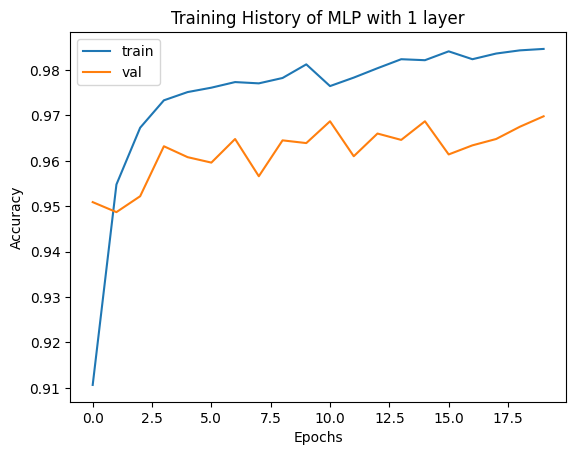

In [15]:
m.plot_history("Training History of MLP with 1 layer")

## Model with two layers

### Building the model

In [16]:
m.build_model_2_layers()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [17]:
m.train_model()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8346 - loss: 6.2004 - val_accuracy: 0.9228 - val_loss: 0.4328
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9383 - loss: 0.2980 - val_accuracy: 0.9451 - val_loss: 0.2715
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9569 - loss: 0.1690 - val_accuracy: 0.9492 - val_loss: 0.2498
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9660 - loss: 0.1286 - val_accuracy: 0.9599 - val_loss: 0.1829
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9723 - loss: 0.0959 - val_accuracy: 0.9665 - val_loss: 0.1816
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9762 - loss: 0.0863 - val_accuracy: 0.9650 - val_loss: 0.1798
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9785 - loss: 0.0770 - val_accuracy: 0.9652 - val_loss: 0.1734
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9792 - loss: 0.0730 - val_accuracy

### Visualizing the model training history

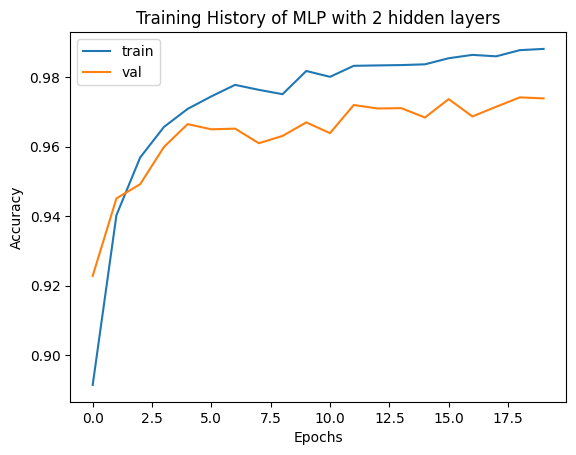

In [18]:
m.plot_history("Training History of MLP with 2 hidden layers")

# Conclusions and Inferences

- Each and every image in the dataset is a well-aligned image with proper image characteristics. However, if the orientation or other image properties are altered then the model does not generalize well.
- Hence, we use data augmentation to make the model more generalized to diverse set of images.
- The images were augmented and MLP with one layer and two layer were trained with their model history being plotted.
- MLP with two layers performs better than MLP with one layer. This clearly evident through the accuracies obtained as 97.57% and 97.01% respectively.
- Moreover, comparing the model training history of the two models, we can infer that the gap between train and validation accuracy is lower in a 2-layer MLP compared to a Single Layer MLP.